# **Car Price Prediction**

The technique of predicting future automobile prices involves using historical data and machine learning algorithms. Both automobile buyers and sellers may find this valuable since it enables them to make well-informed pricing selections.


The cost of an automobile can vary depending on a variety of things, like as
1. The car's brand and model. Regardless of age or condition, some automobiles are just more expensive than others. For instance, a budget-friendly automobile like a Kia would normally cost less than a premium vehicle like a Mercedes-Benz.
2. The car's model year. In general, newer automobiles cost more than older ones, although this isn't always the case. Some older vehicles, like antique automobiles, may be valued more than more recent models.
3. The vehicle's mileage. The value of an automobile will decline as it is driven farther. This is so that issues are less likely to occur in a car with a high mileage.
4. The state of the vehicle. A vehicle in good condition will be more valuable than one in poor condition. This is due to the decreased likelihood of repairs on a vehicle in good condition.
5. The demand for automobiles. The price of a certain automobile will increase if there is a significant demand for it. This is a result of consumers being willing to spend extra for a desired automobile.
6. By considering each of these elements, machine learning algorithms may be used to estimate the cost of an automobile. In order to anticipate the price of a car given its make, model, year, mileage, condition, and demand, the algorithm will learn from prior data and apply this data.



XGBoost is one of the most well-liked automobile price prediction systems. A decision tree algorithm called XGBoost has shown to be quite successful in forecasting automobile prices. Support vector machines, random forests, and linear regression are further techniques that may be used to estimate automobile prices.


In [2]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.0 MB/s eta 0:00:00


In [35]:
pip install matplotlib

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE

from xgboost import XGBRegressor
from xgboost import plot_importance


import optuna

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

In [13]:
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_rows',900)

pd.set_option('max_colwidth',200)

df = pd.read_csv('/content/CarPrice_Assignment.csv')

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [15]:
df.duplicated().sum()


0

In [16]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
car_ID,0,0.0
symboling,0,0.0
highwaympg,0,0.0
citympg,0,0.0
peakrpm,0,0.0
horsepower,0,0.0
compressionratio,0,0.0
stroke,0,0.0
boreratio,0,0.0
fuelsystem,0,0.0


In [17]:
df.nunique()


car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [18]:
df1= df.copy()


In [19]:
df1['CarName'].sample(5)


193    volkswagen dasher
99          nissan rogue
98        nissan clipper
17                bmw x3
52       mazda rx2 coupe
Name: CarName, dtype: object

In [20]:
df1['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [21]:
df1['model'] = [x.split()[0] for x in df1['CarName']]
df1['model'] = df1['model'].replace({'maxda': 'Mazda','mazda': 'Mazda',
                                     'nissan': 'Nissan',
                                     'porcshce': 'Porsche','porsche':'Porsche',
                                     'toyouta': 'Toyota', 'toyota':'Toyota',
                            'vokswagen': 'Volkswagen', 'vw': 'Volkswagen', 'volkswagen':'Volkswagen'})

In [22]:
df1= df1.drop(['car_ID','CarName'], axis=1)

In [23]:
print (f' We have {df1.shape[0]} instances with the {df1.shape[1]-1} features and 1 output variable')

 We have 205 instances with the 24 features and 1 output variable


In [24]:

numerical= df1.drop(['price'], axis=1).select_dtypes('number').columns

categorical = df1.select_dtypes('object').columns

print(f'Numerical Columns:  {df1[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df1[categorical].columns}')

Numerical Columns:  Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


Categorical Columns: Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'model'],
      dtype='object')


In [25]:
df1['price'].describe()


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [26]:
print( f"Skewness: {df1['price'].skew()}")


Skewness: 1.7776781560914454


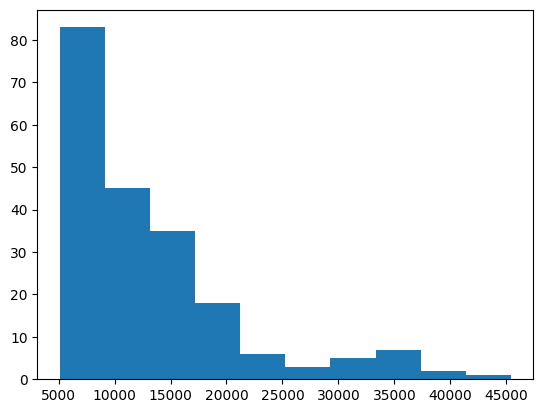

In [38]:
plt.hist(df1['price'])
plt.show()


In [30]:
df1[numerical].describe()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


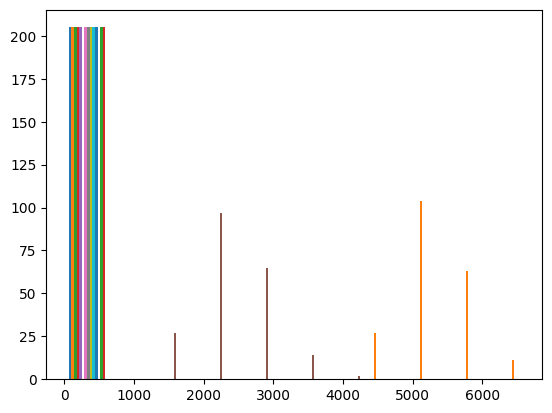

In [40]:
plt.hist(df1[numerical])
plt.show()


In [47]:
skew_limit = 0.75
skew_vals = df1[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

compressionratio    2.610862
enginesize          1.947655
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
dtype: float64

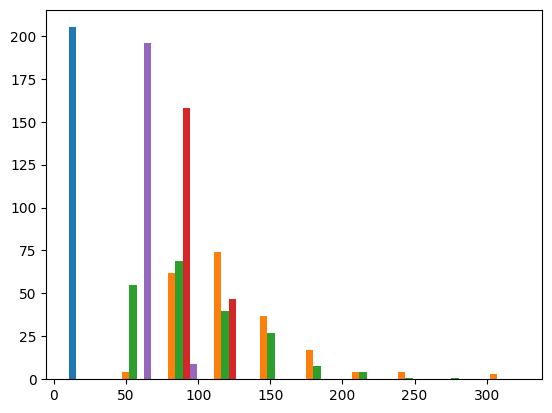

In [49]:
plt.hist(df1[skew_cols.index])
plt.show()



compressionratio    2.379056
enginesize          0.864706
horsepower          0.489938
wheelbase           0.885024
carwidth            0.815331
dtype: float64



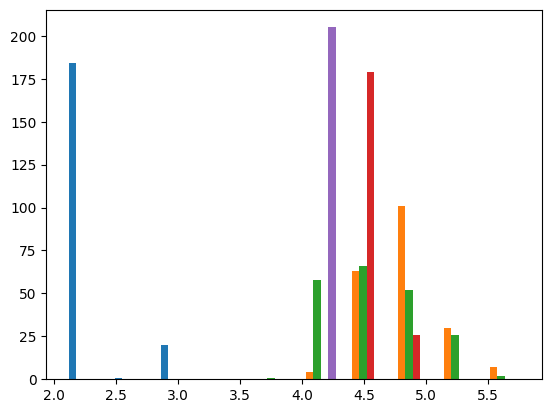

In [51]:
df_try = df1.copy()

for col in skew_cols.index.values:
    df_try[col] = df_try[col].apply(np.log1p)

print(df_try[skew_cols.index].skew())
print()

plt.hist(df_try[skew_cols.index])
plt.show()

compressionratio    0.034222
enginesize         -0.002542
horsepower          0.049318
wheelbase          -0.003485
carwidth            0.000000
dtype: float64



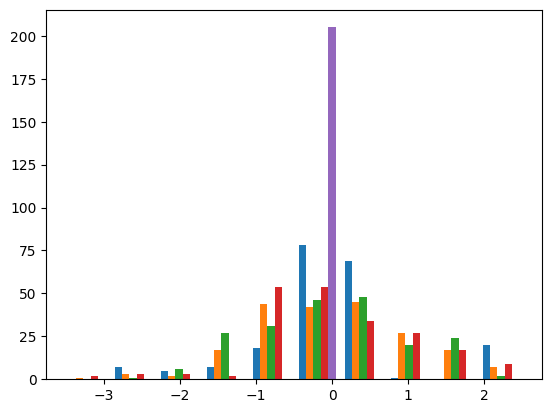

In [52]:
df_trans = df1[skew_cols.index].copy()
pt = PowerTransformer(method='yeo-johnson')
trans= pt.fit_transform(df_trans)
df_trans = pd.DataFrame(trans, columns =skew_cols.index )
print(df_trans.skew())
print()
plt.hist(df_trans[skew_cols.index])
plt.show()

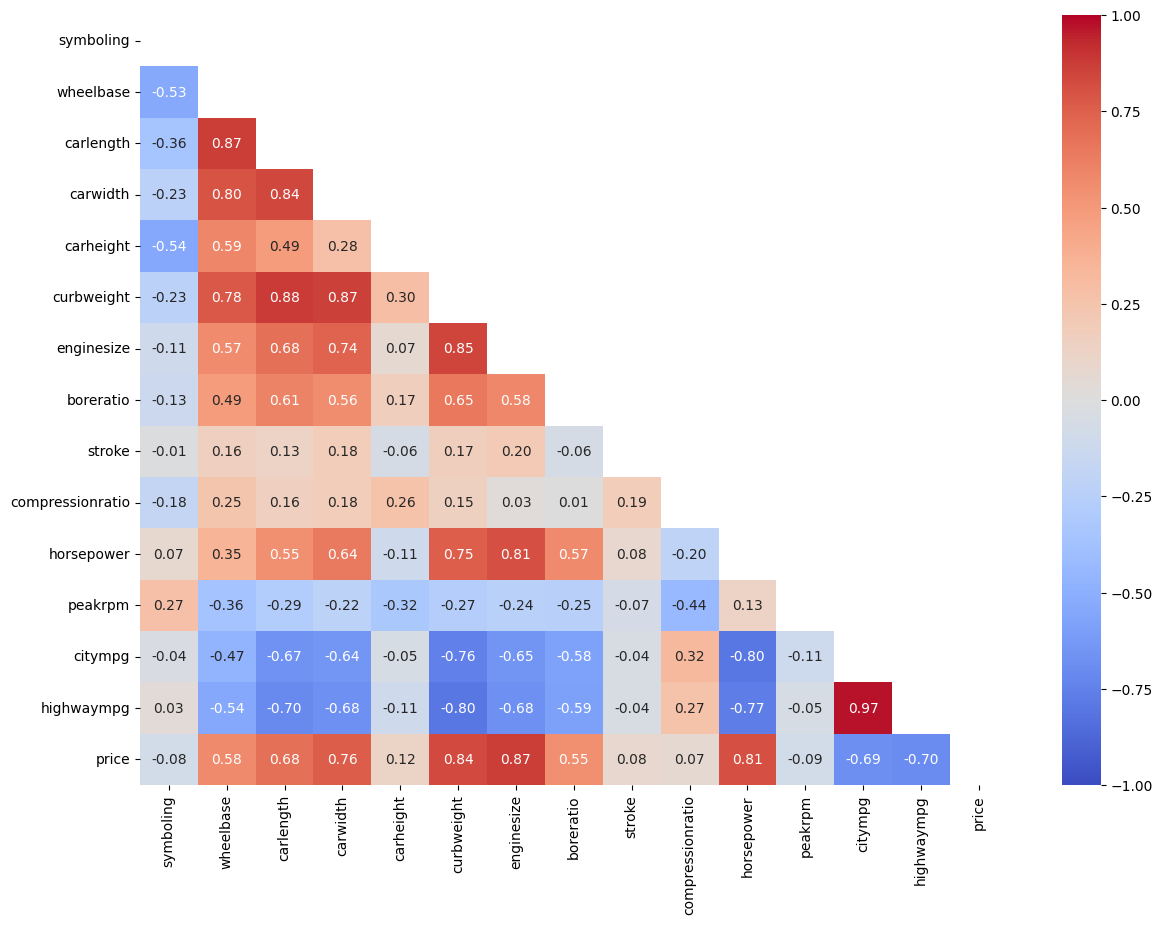

In [53]:
numerical1= df1.select_dtypes('number').columns


matrix = np.triu(df1[numerical1].corr())
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap (df1[numerical1].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

In [54]:
df1 = df1.drop('citympg',axis=1)


In [55]:
df1[categorical].head()


,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,model
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


fueltype
gas       12999.7982
diesel    15838.1500
Name: price, dtype: float64



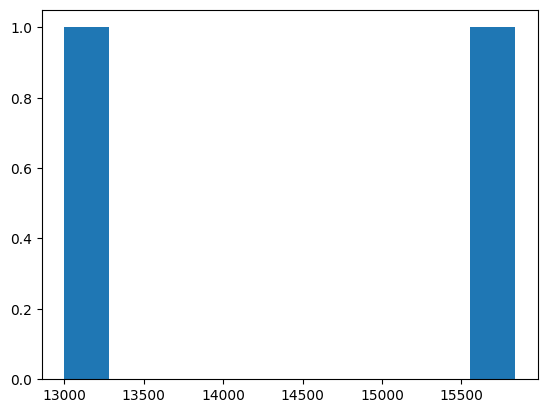

In [58]:
print(df1.groupby('fueltype')['price'].mean().sort_values())
print()
plt.hist(df1.groupby('fueltype')['price'].mean())
plt.show()


aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64



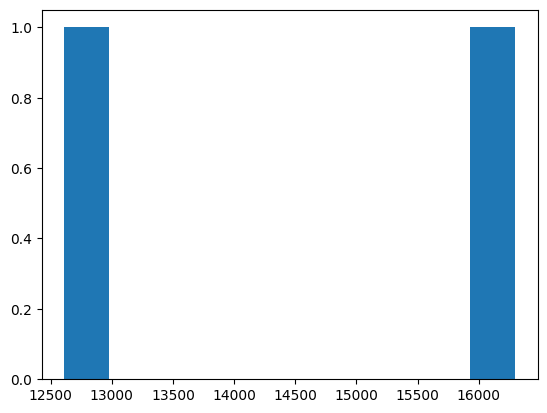

In [60]:
print(df1.groupby('aspiration')['price'].mean().sort_values())
print()
plt.hist(df1.groupby('aspiration')['price'].mean())
plt.show()

carbody
hatchback      10376.652386
wagon          12371.960000
sedan          14344.270833
convertible    21890.500000
hardtop        22208.500000
Name: price, dtype: float64



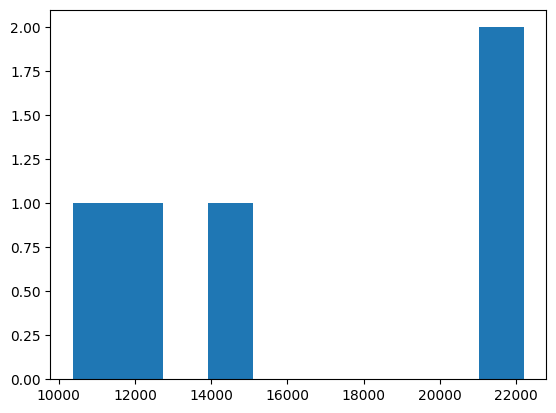

In [61]:

print(df1.groupby('carbody')['price'].mean().sort_values())
print()
plt.hist(df1.groupby('carbody')['price'].mean())
plt.show()

drivewheel
fwd     9239.308333
4wd    11087.463000
rwd    19910.809211
Name: price, dtype: float64



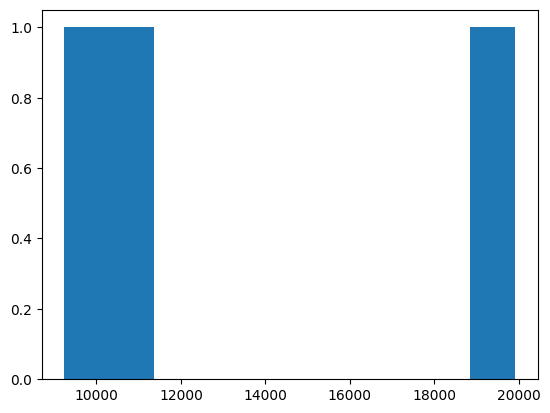

In [62]:
print(df1.groupby('drivewheel')['price'].mean().sort_values())
print()
plt.hist(df1.groupby('drivewheel')['price'].mean())
plt.show()

enginelocation
front    12961.097361
rear     34528.000000
Name: price, dtype: float64



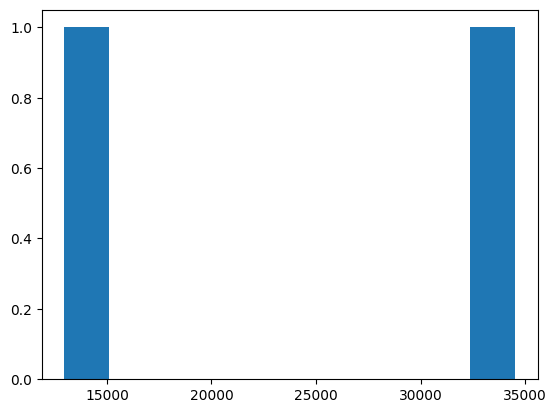

In [63]:
print(df1.groupby('enginelocation')['price'].mean().sort_values())
print()
plt.hist(df1.groupby('enginelocation')['price'].mean())
plt.show()

enginetype
ohc      11574.048426
rotor    13020.000000
ohcf     13738.600000
l        14627.583333
dohc     18116.416667
ohcv     25098.384615
dohcv    31400.500000
Name: price, dtype: float64



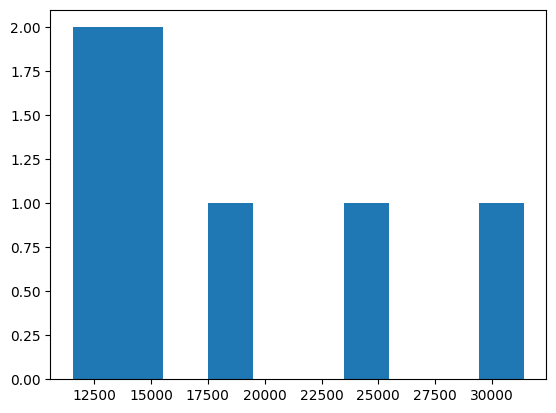

In [64]:
print(df1.groupby('enginetype')['price'].mean().sort_values())
print()
plt.hist(df1.groupby('enginetype')['price'].mean())
plt.show()

fuelsystem
2bbl     7478.151515
1bbl     7555.545455
spdi    10990.444444
spfi    11048.000000
4bbl    12145.000000
mfi     12964.000000
idi     15838.150000
mpfi    17754.602840
Name: price, dtype: float64



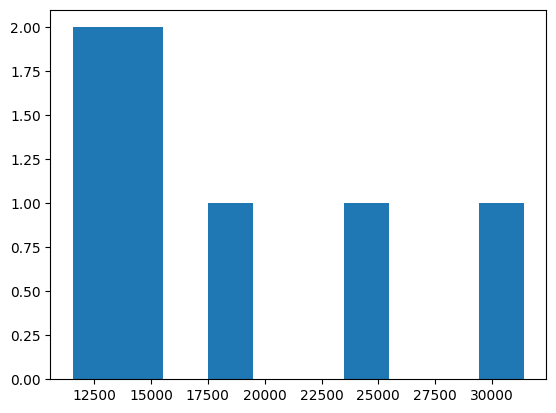

In [65]:
print(df1.groupby('fuelsystem')['price'].mean().sort_values())
print()
plt.hist(df1.groupby('enginetype')['price'].mean())
plt.show()

model
chevrolet       6007.000000
dodge           7875.444444
plymouth        7963.428571
honda           8184.692308
subaru          8541.250000
isuzu           8916.500000
mitsubishi      9239.769231
renault         9595.000000
Toyota          9885.812500
Volkswagen     10077.500000
Nissan         10415.666667
Mazda          10652.882353
saab           15223.333333
peugeot        15489.090909
alfa-romero    15498.333333
mercury        16503.000000
audi           17859.166714
volvo          18063.181818
bmw            26118.750000
Porsche        31400.500000
buick          33647.000000
jaguar         34600.000000
Name: price, dtype: float64



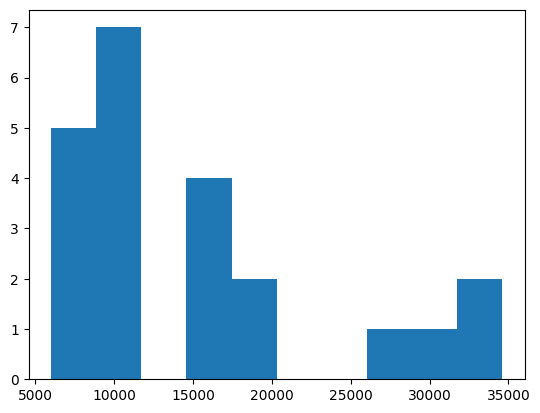

In [66]:
print(df1.groupby('model')['price'].mean().sort_values())
print()
plt.hist(df1.groupby('model')['price'].mean())
plt.show()

In [67]:
df2 = pd.get_dummies(df1, columns=categorical, drop_first=True)
df2.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,model_Nissan,model_Porsche,model_Toyota,model_Volkswagen,model_alfa-romero,model_audi,model_bmw,model_buick,model_chevrolet,model_dodge,model_honda,model_isuzu,model_jaguar,model_mercury,model_mitsubishi,model_peugeot,model_plymouth,model_renault,model_saab,model_subaru,model_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,27,13495.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,27,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,26,16500.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,30,13950.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,22,17450.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print (f'model : {model} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {r2_score(y_test, y_pred)}')

model : LinearRegression() and  rmse score is : 2650.5603370223234, r2 score is 0.8985995076954856


In [70]:
rmse_test =[]
r2_test =[]
model_names =[]

numerical2= df2.drop(['price'], axis=1).select_dtypes('number').columns

X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

s = StandardScaler()
p= PowerTransformer(method='yeo-johnson', standardize=True)

rr = Ridge()
las = Lasso()
el= ElasticNet()
knn = KNeighborsRegressor()

models = [rr,las,el,knn]

for model in models:
    ct = make_column_transformer((s,numerical2),(p,skew_cols.index),remainder='passthrough')
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),2)}')

model_names = ['Ridge','Lasso','ElasticNet','KNeighbors']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : Ridge() and  rmse score is : 2423.29, r2 score is 0.92
model : Lasso() and  rmse score is : 2329.06, r2 score is 0.92
model : ElasticNet() and  rmse score is : 3350.1, r2 score is 0.84
model : KNeighborsRegressor() and  rmse score is : 4048.91, r2 score is 0.76


,RMSE,R2_Test
Ridge,2423.29,0.92
Lasso,2329.06,0.92
ElasticNet,3350.10,0.84
KNeighbors,4048.91,0.76


In [72]:
rmse_test =[]
r2_test =[]
model_names =[]



X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et= ExtraTreesRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [rf,gb,et,xgb]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

model_names = ['RandomForest','GradientBoost','ExtraTree','XGB']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : RandomForestRegressor(random_state=42) and  rmse score is : 1984.44, r2 score is 0.9432
model : GradientBoostingRegressor(random_state=42) and  rmse score is : 2422.19, r2 score is 0.9153
model : ExtraTreesRegressor(random_state=42) and  rmse score is : 2641.67, r2 score is 0.8993
model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             p

,RMSE,R2_Test
RandomForest,1984.44,0.94
GradientBoost,2422.19,0.92
ExtraTree,2641.67,0.90
XGB,2416.10,0.92


In [73]:
X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators= 220, random_state=42 )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print (f' rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),4)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

 rmse score is : 1975.8483, r2 score is 0.9437


symboling : 0.001
wheelbase : 0.008
carlength : 0.013
carwidth : 0.024
carheight : 0.004
curbweight : 0.167
enginesize : 0.6
boreratio : 0.005
stroke : 0.003
compressionratio : 0.005
horsepower : 0.028
peakrpm : 0.005
highwaympg : 0.118
enginetype_ohc : 0.001
model_bmw : 0.006



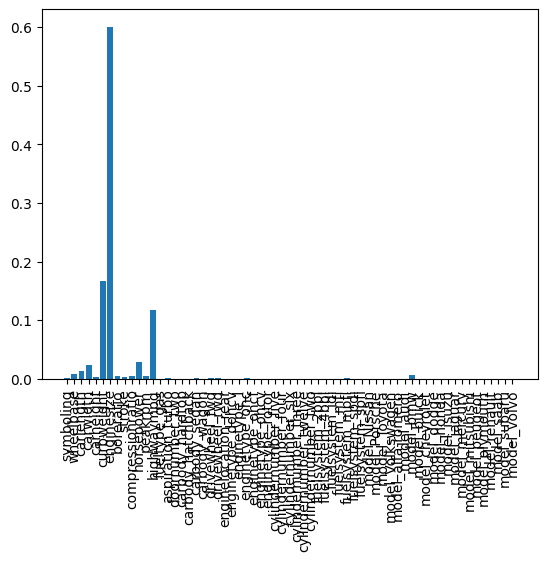

In [74]:
importances = rf.feature_importances_
feature_names = [f'feature {i}' for i in range(X.shape[1])]

# what are scores for the features
for i in range(len(rf.feature_importances_)):
    if rf.feature_importances_[i] >0.001:
        print(f'{X_train.columns[i]} : {round(rf.feature_importances_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(rf.feature_importances_))], rf.feature_importances_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.show()